This notebook contains some exploratory data analysis of stock market data grabbed from the internet, along with visualisation and predictions of future price.

The questions I'll attempt to answer are:
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

In [1]:
#Let's import the packages we'll be using in this analysis.
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import scipy as sp

#Viz packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To let us read stock data from Yahoo
from pandas_datareader import DataReader

#For time stamping
from datetime import datetime

#For divsion
from __future__ import division

In [2]:
#Let's use Pandas to grab some Korean stock information from Yahoo. KT, Coupang, KEP and Posco.
ko_list = ['KT','CPNG','KEP','PKX']

# Set up start and end times for data grab.
end = datetime.now()
start = datetime(end.year-1, end.month,end.day)

#For loop for grabbing info from Yahoo finance and arranging as a dataframe.

for stock in ko_list:
    #Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [3]:
#Summary Stats for Coupang using describe()
CPNG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,22.779421,21.619722,22.212163,22.200040,1.015442e+07,22.200040
std,6.894904,6.794607,6.868505,6.847070,6.252724e+06,6.847070
min,10.790000,8.980000,10.060000,9.350000,3.379600e+06,9.350000
25%,16.982500,15.895000,16.534999,16.592500,6.261050e+06,16.592500
50%,23.220000,21.285000,21.950000,22.460000,8.499800e+06,22.460000
75%,28.975000,27.982501,28.462499,28.362500,1.185070e+07,28.362500
max,39.860001,38.320999,39.730000,39.490002,4.327980e+07,39.490002


In [4]:
CPNG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-09 to 2022-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

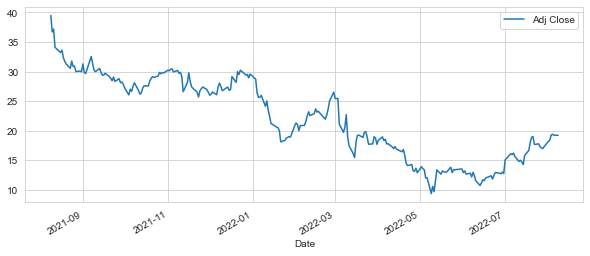

In [5]:
#Let's visualise a historical view of the closing price.
CPNG['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

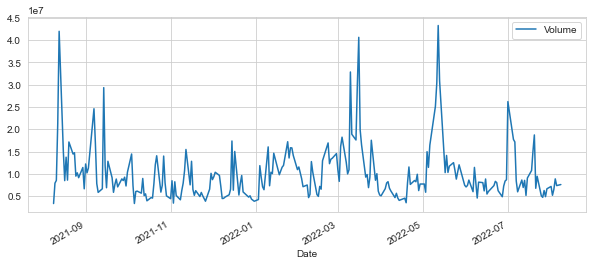

In [6]:
#Plot total volume of stock being traded each day.
CPNG['Volume'].plot(legend=True,figsize=(10,4))

In [7]:
#Let's look at some rolling averages for closing values using pandas.

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    #Deprecated code from Python 2.0.
    #CPNG[column_name]=pd.rolling.mean(CPNG['Adj Close'],ma)
    #Equivalent using up to date syntax
    CPNG[column_name]=CPNG.rolling(ma)['Adj Close'].mean()

<AxesSubplot:xlabel='Date'>

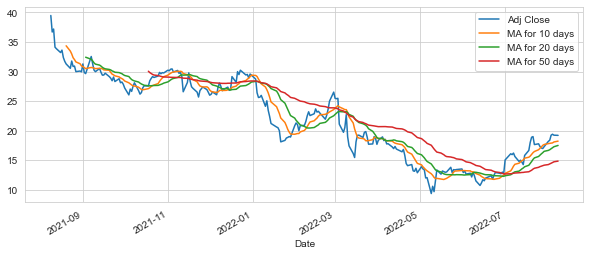

In [8]:
CPNG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

We've completed some basic analysis and some interesting charts.
Now we can look at daily return analysis.

<AxesSubplot:xlabel='Date'>

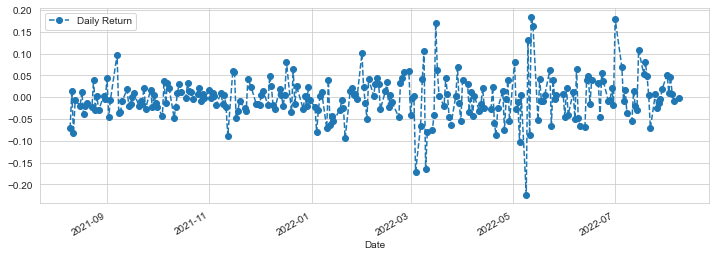

In [9]:
#Let's find the percentage change for each day for Coupang.
CPNG['Daily Return']=CPNG['Adj Close'].pct_change()
CPNG['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

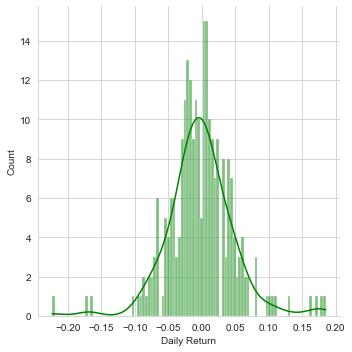

In [10]:
#Now we can look at the average daily return with a histogram and KDE.
sns.displot(CPNG['Daily Return'].dropna(),bins=100,color='green',kde=True)

In [11]:
#Let's compose a dataframe of all the stocks we're interested in:
closingvalue_df = DataReader(['KT','CPNG','KEP','PKX'],'yahoo',start,end)['Adj Close']

In [12]:
closingvalue_df.head()

Symbols,KT,CPNG,KEP,PKX
Date,,,,
2021-08-09,14.66,39.490002,11.01,74.279999
2021-08-10,14.36,36.700001,10.95,74.680000
2021-08-11,15.13,37.200001,10.86,75.559998
2021-08-12,14.77,34.130001,10.77,72.589996
2021-08-13,14.60,33.869999,10.66,71.570000


C:\Users\Ross\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


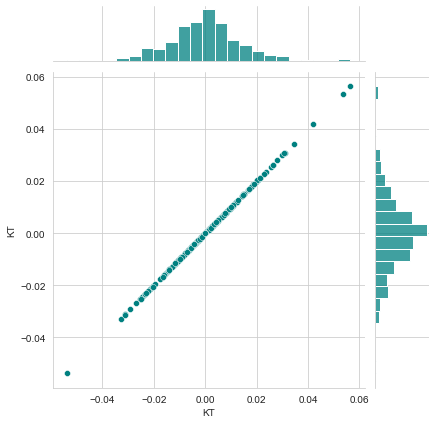

In [13]:
#Let's compare all the daily returns
ko_rets = closingvalue_df.pct_change()

#And check the data - comparing a company to itself should produce a perfectly linear plot.
x='KT'
y='KT'
data=ko_rets
sns.jointplot(x,y,data,kind='scatter',color='teal')

C:\Users\Ross\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


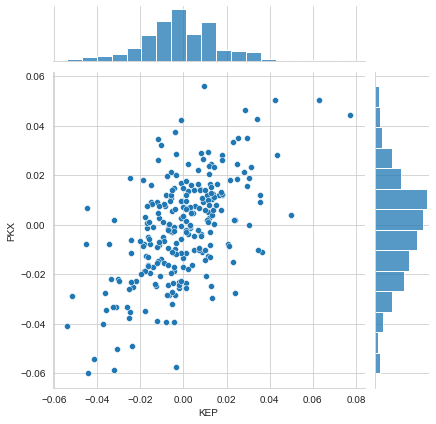

In [14]:
#Let's compare KEP and PKX (Korea Electric Power Co and Posco)
sns.jointplot('KEP','PKX',ko_rets,kind='scatter')

In [15]:
#sp.stats.pearsonr(ko_rets['PKX'],ko_rets['KEP'].dropna())
#Because of the short history of these stocks in non-Korean markets, Pearson's CC cannot be applied simply. I need to figure out how to slice this in a meaningful fashion.

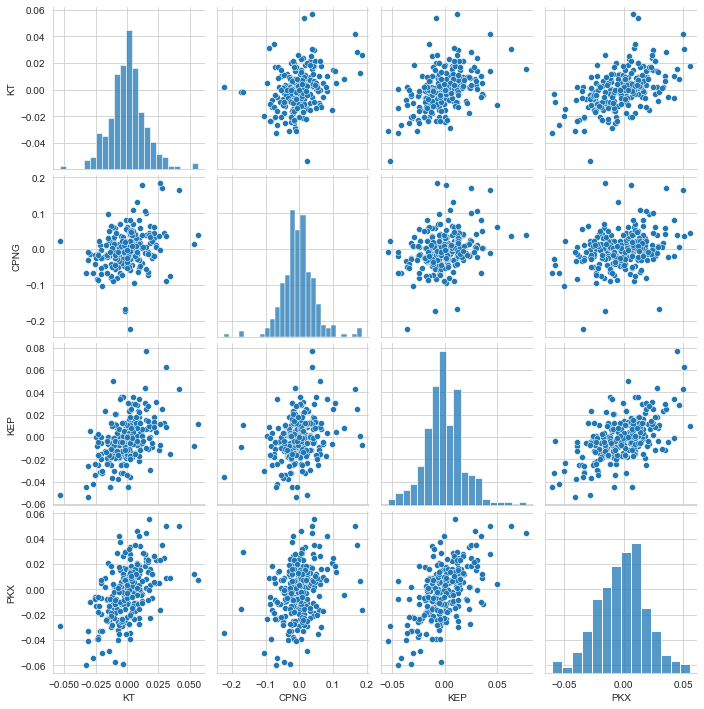

In [16]:
#Let's compare all the possible pairs visually.
sns.pairplot(ko_rets.dropna())

Generally poor correlations, although KEP and PKX have a slightly more defined pattern.
Perhaps due to the effect of electricity prices on Posco's principal output: steel.

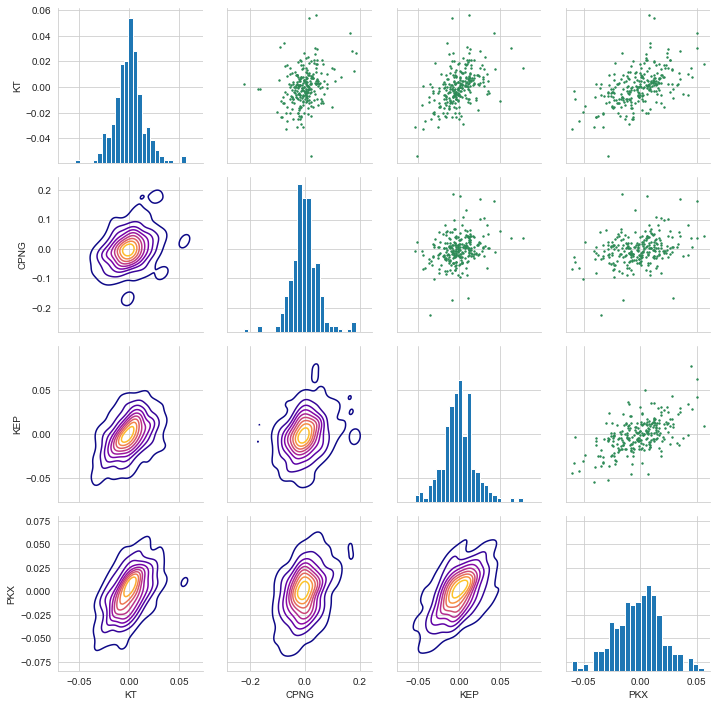

In [17]:
#Let's visualise the above useing different types of graphs.
returns_figure = sns.PairGrid(ko_rets.dropna())

#Using map_upper we can specify what the upper charts will be.
returns_figure.map_upper(plt.scatter,s=2,color='seagreen')

#Ditto for the lower part of the grid, we can make some kdeplots with a funky colourmap.
returns_figure.map_lower(sns.kdeplot,cmap='plasma')

#Ditto for the 'diagonal'
returns_figure.map_diag(plt.hist,bins=25)

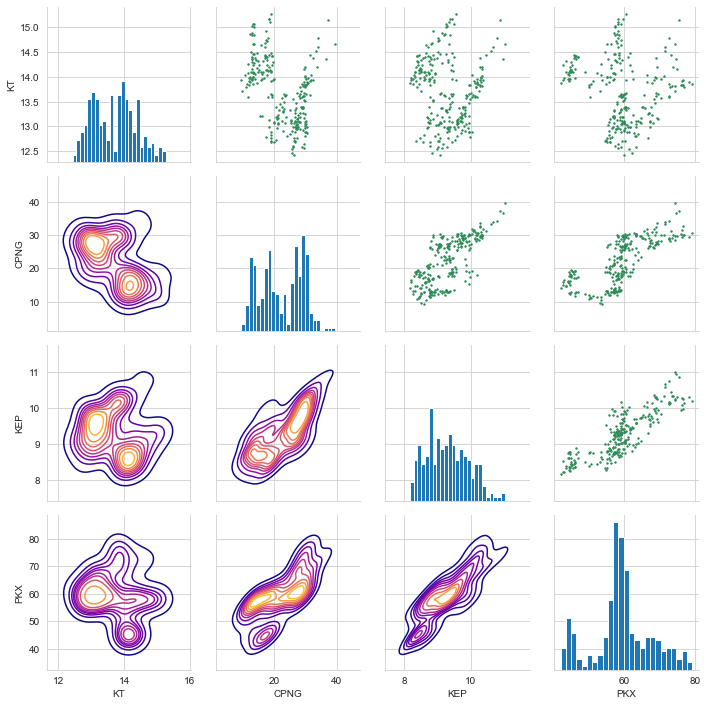

In [18]:
#We could also look at the closing values for the above by substituting in our earlier
#dataframe, closingvalue_df

closing_figure = sns.PairGrid(closingvalue_df.dropna())

closing_figure.map_upper(plt.scatter,s=2,color='seagreen')

closing_figure.map_lower(sns.kdeplot,cmap='plasma')

closing_figure.map_diag(plt.hist,bins=25)

Some more definite patterns are emerging in the closing prices!

Let's look at a corrplot, another good way to visualise correlations.

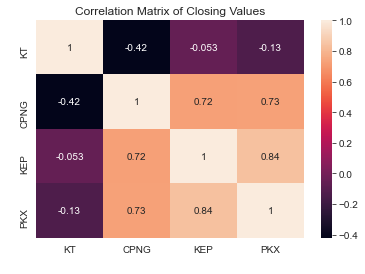

In [19]:
correlation_matrix = closingvalue_df.corr(method='pearson')

#Visualise correlation matrix using Seaborn.
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Closing Values')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

Let's quantify the risk. A common way to do this is to compare the expected return with the standard deviation of the daily returns.

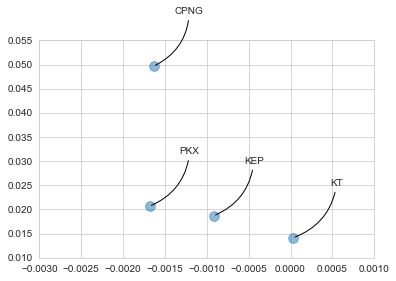

In [20]:
#Create a new clean dataframe
risk_rets = ko_rets.dropna()

area = np.pi*30

plt.scatter(risk_rets.mean(), risk_rets.std(), alpha=0.5,s=area)
#Set limits for readability
plt.ylim([0.01,0.055])
plt.xlim([-0.003,0.001])

#Label the scatter plots with some fancy arrows
for label, x, y in zip(ko_rets.columns, ko_rets.mean(), ko_rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3', color='black'))

Value at risk. Let's estimate this, which is the amount of money we could expect to to lose for a certain confidence interval.

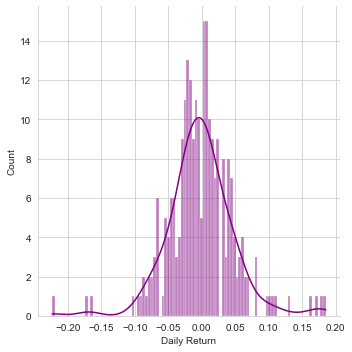

In [21]:
sns.displot(CPNG['Daily Return'].dropna(),bins=100,color='purple',kde=True)

In [22]:
#We can now look use quantile to get the risk value for the stock.
ko_rets['CPNG'].quantile(0.05)*100

-7.293140313126173

So with 95% confidence, the worst daily loss will not exceed 7.2%. So with a £100,000 investment, the one day 5% VAR is £7,200.

In [23]:
#Let's repeat for the other stocks. 
PKX['Daily Return']=PKX['Adj Close'].pct_change()
KEP['Daily Return']=KEP['Adj Close'].pct_change()
KT['Daily Return']=KT['Adj Close'].pct_change()

posco_ret = ko_rets['PKX'].quantile(0.05)*100
kep_ret = ko_rets['KEP'].quantile(0.05)*100
kt_ret = ko_rets['KT'].quantile(0.05)*100

print ('POSCO 5% VAR = ',posco_ret)
print ('KEPCO 5% VAR = ',kep_ret)
print ('KT 5% VAR = ',kt_ret)

POSCO 5% VAR =  -3.5268650400027193
KEPCO 5% VAR =  -3.222417278866047
KT 5% VAR =  -2.2976493982894306


So our 'least risky' stock of the 4 is KT.

Now, we are going to use a Monte Carlo method to model the potential Value At Risk for KT. 

Based on the following article plus some Googling and experimentation: https://www.investopedia.com/articles/07/montecarlo.asp

In [24]:
# Let's define our time period (t)
days = 365

# Now our delta t
dt = 1/days

# Now we can define the value of mu (drift) from the ko_rets dataframe for KT.
mu = ko_rets.mean()['KT']

# And the same for the volatility (sigma) from the standard deviation of the average return.
sigma = ko_rets.std()['KT']

In [35]:
# Now we need a function that takes a starting period and value for t and use the drift and volatility we have 
# calculated from our average returns data.

def ko_stock_monte_carlo(start_price,days,mu,sigma):
    #Define a starting price array
    price = np.zeros(days)
    price[0] = start_price
    #Define shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #Generate price array for number of days
    for x in range(1,days):
        #Shock
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        #Drift
        drift[x] = mu*dt
        #Calculate Pirce
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [36]:
CPNG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-08-09,39.860001,38.320999,38.400002,39.490002,3379600,39.490002,NaN,NaN,NaN,NaN
2021-08-10,39.840000,36.340000,39.730000,36.700001,7948400,36.700001,NaN,NaN,NaN,-0.070651
2021-08-11,37.549999,36.160000,36.299999,37.200001,8563000,37.200001,NaN,NaN,NaN,0.013624
2021-08-12,35.055000,33.889999,34.250000,34.130001,21287700,34.130001,NaN,NaN,NaN,-0.082527
2021-08-13,36.491001,33.009998,34.650002,33.869999,41979600,33.869999,NaN,NaN,NaN,-0.007618


Closing price for 09/08/2021 is USD39.490002, this will be our starting price.

Text(0.5, 1.0, 'Monte Carlo Analysis for KT')

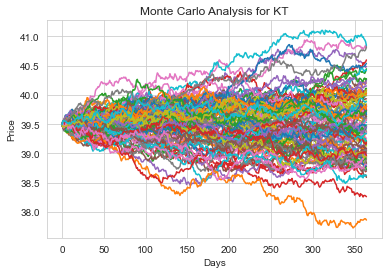

In [38]:
start_price = 39.490002

#We will do 100 runs of this model.
for run in range(100):
    plt.plot(ko_stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for KT")



We can use a historgram for a larger number of runs, in this case 10,000.

In [42]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Change the np print options to display 0-5 options.
np.set_printoptions(threshold=5)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = ko_stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now we have our simulations, we can plot a histogram and use quantiles to define out risk
for this stock.

Text(0.5, 1.0, 'Final price distribution for KT stock after 365 days')

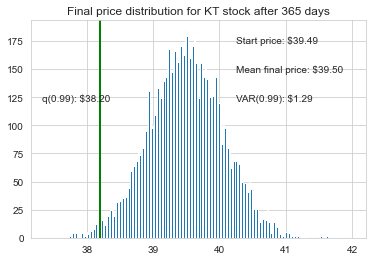

In [46]:
# q is our 1% quantile, i.e. 99% of values should fall within this interval.
q = np.percentile(simulations,1)

# Plot the end prices
plt.hist(simulations,bins=200)
# Starting price annotation
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
#Mean ending price annotation
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())
#Price variance annotation (within 99% confidence interval)
plt.figtext(0.6,0.6, "VAR(0.99): $%.2f" %(start_price - q))
#Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)
#Plot a vertical line at the 1% quantile result.
plt.axvline(x=q, linewidth=2, color='green')
#Title
plt.title("Final price distribution for KT stock after %s days" %days)